In [170]:
import numpy as np
c =  np.array([[9,8,7] , [1,2,4]])
d =  np.array([[1,2,3] ,  [5,4,6]])
result = c + d
print(result.dtype)



int32


#### Fuel Data
* Determine and fill ```NA``` values in the fuel unit column

In [169]:
import pandas as pd
url = 'https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv'
fuel_data = pd.read_csv(url) 
fuel_data.head()
fuel_data.describe(include= 'all')
fuel_data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

#### Using ```'groupby'``` to categorise dataframe into different segments.
* Split the dataframe into groups then apply a function to the groups after which the results are combined.

In [4]:
fuel = fuel_data.groupby('fuel_unit')['fuel_unit'].count()
fuel_data['fuel_unit'] = fuel_data['fuel_unit'].fillna(value = 'mcf')
fuel_data.isnull().sum()

fuel

fuel_unit
bbl        7998
gal          84
gramsU      464
kgU         110
mcf       11354
mmbtu       180
mwdth        95
mwhth       100
ton        8958
Name: fuel_unit, dtype: int64

#### Merging Dataframes
* Checking for duplicates

In [165]:
df1 = fuel_data.iloc[0:2000].reset_index(drop = True)
df2 = fuel_data.iloc[2000:].reset_index(drop = True)
assert len(fuel_data) == (len(df1) + len(df2))
fuel_data = pd.merge(df1, df2, how = 'left')


pd.merge(df1, df2, how = 'inner')
pd.merge(df1, df2, how = 'right')

fuel_data.duplicated().any()

False

#### Creating visuals with python

In [166]:
# %pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Count of each fuel unit')

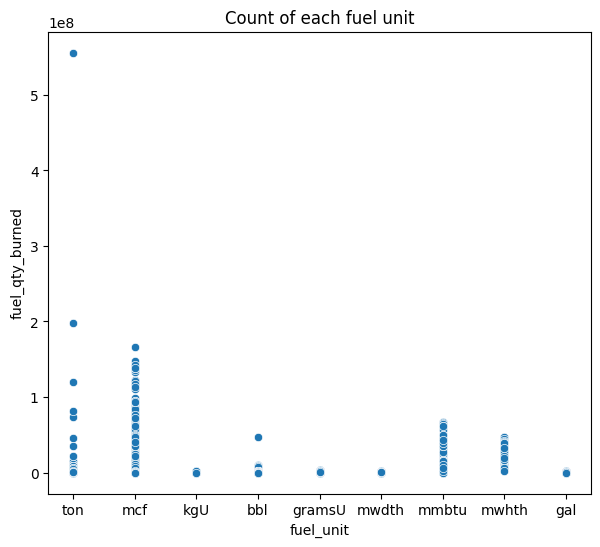

In [172]:
plt.figure(figsize = (7,6))
fuel_unit_count = fuel_data.groupby('fuel_unit')['fuel_unit'].count()
fuel_data1 = fuel_data['fuel_unit'].count()
sns.scatterplot(data = fuel_data,x = 'fuel_unit', y = 'fuel_qty_burned')
plt.title('Count of each fuel unit')


In [197]:
data = np.array([2,3,4,5,6,7,410])
df = pd.Series(data)
df

0      2
1      3
2      4
3      5
4      6
5      7
6    410
dtype: int32

In [196]:
import pandas as pd
lst = [[35, 'Portugal', 94], [33, 'Argentina', 93], [30 , 'Brazil', 92]]

col = ['Age','Nationality','Overall']
pd.DataFrame(lst, columns= col, index = [i for i in range (1,4)])
pd.DataFrame(lst, columns= col, index = (1,2,3))







,Age,Nationality,Overall
1,35,Portugal,94
2,33,Argentina,93
3,30,Brazil,92


In [181]:
array  = ([[94, 89, 63],

             [93, 92, 48],

             [92, 94, 56]])
print(f"Bold text: {array[:2]}")

Bold text: [[94, 89, 63], [93, 92, 48]]


In [191]:
import pandas as pd
data = pd.read_csv("C:/Users/Badru/Videos/Internship_hamoyeHQ/FoodBalanceSheets_E_Africa_NOFLAG.csv", encoding = "latin-1")
data.head()

d1 =data.describe()
round_d1 = round(d1, 2)
round_d1


,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
count,60943.00,60943.00,60943.00,59354.00,59395.00,59408.00,59437.00,59507.00
mean,134.27,2687.18,3814.86,134.20,135.24,136.56,140.92,143.76
std,72.61,146.06,2212.01,1567.66,1603.40,1640.01,1671.86,1710.78
min,4.00,2501.00,511.00,-1796.00,-3161.00,-3225.00,-1582.00,-3396.00
25%,74.00,2562.00,684.00,0.00,0.00,0.00,0.00,0.00
50%,136.00,2630.00,5142.00,0.09,0.08,0.08,0.10,0.07
75%,195.00,2775.00,5511.00,8.34,8.46,8.43,9.00,9.00
max,276.00,2961.00,5911.00,176405.00,181137.00,185960.00,190873.00,195875.00


In [184]:
col_for_corr =  ['Element Code','Y2014','Y2015','Y2016','Y2017','Y2018']
corr_ele = data[col_for_corr].corr()['Element Code']
corr_ele.sort_values()


Y2016           0.023444
Y2015           0.023889
Y2017           0.024254
Y2018           0.024279
Y2014           0.024457
Element Code    1.000000
Name: Element Code, dtype: float64

#### Total number of missing data and Percentage in 2014


In [104]:
null_v  = data['Y2014'].isnull().sum()
count_year = data['Y2014'].count()
perc_year = round((null_v/ count_year) * 100, 3)
print(f"Total number of missing values: {null_v}")
print(f"The percentage of missing data: {perc_year} ")

Total number of missing values: 1589
The percentage of missing data: 2.677 


### Count total Number of Unique countries 

In [190]:
data['Area'].nunique()

49

In [64]:
y = [(2, 4), (7, 8), (1, 5, 9)]
x = y[1][1]
x

8

###

#### Tuples are ```'immutable'``` as it returns a ```'TypeError'```

In [44]:
S = [['him', 'sell'], [90, 28, 43]]

S[0][1][1]

my_tuppy = (1,2,5,8)

my_tuppy[2] = 6

TypeError: 'tuple' object does not support item assignment

#### A ```groupby``` operation to return the 7th lowest sum in 2017

In [126]:


# Select columns 'Y2017' and 'Area'
selected_columns = ['Y2017', 'Area']
df_selected = data[selected_columns]

# Group by 'Area' and calculate the sum of 'Y2017' for each 'Area'
grouped = df_selected.groupby('Area')['Y2017'].sum().reset_index()

# Sort the values in ascending order to find the 7th lowest sum
sorted_areas = grouped.sort_values(by='Y2017', ascending=True)
# To obtain the 7th row
sorted_areas.iloc[6]
# Get the 7th row (index 6, since index starts from 0)



Area     Guinea-Bissau
Y2017         19102.77
Name: 21, dtype: object

##### Perform a groupby operation on ```‘Area’```.  Which of these Areas had the highest sum in 2017.

In [131]:


# Select columns 'Y2017' and 'Area'
selected_columns = ['Y2017', 'Area']
df_selected = data[selected_columns]

# Group by 'Area' and calculate the sum of 'Y2017' for each 'Area'
grouped = df_selected.groupby('Area')['Y2017'].sum().reset_index()
sorted_grp = grouped.sort_values(by = 'Y2017', ascending = False)
sorted_grp.iloc[0]



Area        Nigeria
Y2017    1483268.23
Name: 34, dtype: object

In [186]:


# Group by 'Element' and calculate the sum for each 'Element'
grouped = data.groupby('Element')['Y2017'].sum()

processing_sum_2017 = grouped.get('Processing')
processing_sum_2017


292836.0

In [68]:


# Filter for 'Protein supply quantity' in Madagascar for 2015
protein_madagascar_2015 = data[(data['Area'] == 'Madagascar') & 
                             (data['Element'] == 'Protein supply quantity (g/capita/day)') & 
                             (data['Y2015'] > 0)]

# Calculate the total Protein supply quantity
total_protein_madagascar_2015 = protein_madagascar_2015['Y2015'].sum()

print("Total Protein supply quantity in Madagascar for 2015:", total_protein_madagascar_2015, "g/capita/day")


Total Protein supply quantity in Madagascar for 2015: 173.04999999999998 g/capita/day


In [133]:
data.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28


#### Total sum of Wine produced in 2015 and 2018

In [154]:
d_2018 = data.groupby('Item')['Y2018'].sum().reset_index()
d_2018.loc[117]
d_2015 = data.groupby('Item')['Y2015'].sum().reset_index()
print(f" Total sum of wine produced in 2015 : {d_2015.loc[117]}")
print(f" Total sum of wine produced in 2018 : {d_2018.loc[117]}")

 Total sum of wine produced in 2015 : Item        Wine
Y2015    4251.81
Name: 117, dtype: object
 Total sum of wine produced in 2018 : Item        Wine
Y2018    4039.32
Name: 117, dtype: object
